**Project that uses a machine learning model to predict.**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

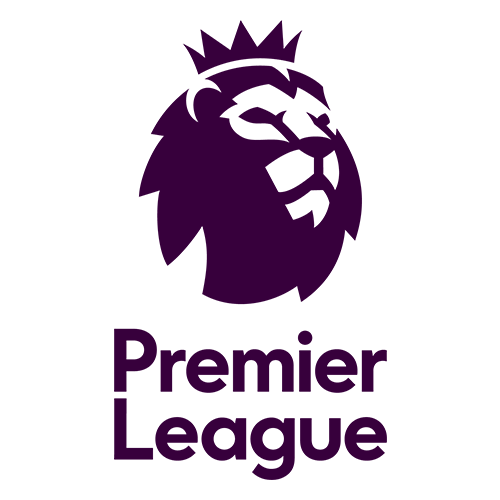

#Cargamos el dataset
 Este dataset corresponde a las tablas de posiciones de la Premier League desde la season 2000-01 a la season 2021-22
Los indices son:

 - Temporada
 - Posición (Puesto en liga)
 - Equipo
 - Partidos jugados
 - Partidos Ganados
 - Partidos Perdidos
 - Partido empatados
 - Goles a favor
 - Goles en contra
 - Diferencia de goles
 - Puntos totales
 - Campeonato al que clasifican por la posición

In [ ]:
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTC_Q4qiayP1uhNNXhps0tyCdC4QHuqHdnmriBuzsM7Dr0Ez8IbqaNaot4lBtXJgXRd50l1GlrfUR0M/pub?gid=908497832&single=true&output=csv')
df.head(15)

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]
5,2000-01,6,Chelsea,38,17,10,11,68,45,23,61,Qualification for the UEFA Cup first round[a]
6,2000-01,7,Sunderland,38,15,12,11,46,41,5,57,Not Applicable
7,2000-01,8,Aston Villa,38,13,15,10,46,43,3,54,Qualification for the Intertoto Cup third round
8,2000-01,9,Charlton Athletic,38,14,10,14,50,57,-7,52,Not Applicable
9,2000-01,10,Southampton,38,14,10,14,40,48,-8,52,Not Applicable


**Revisamos la estructura de los datos**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       440 non-null    object
 1   Pos                          440 non-null    int64 
 2   Team                         440 non-null    object
 3   Pld                          440 non-null    int64 
 4   W                            440 non-null    int64 
 5   D                            440 non-null    int64 
 6   L                            440 non-null    int64 
 7   GF                           440 non-null    int64 
 8   GA                           440 non-null    int64 
 9   GD                           440 non-null    int64 
 10  Pts                          440 non-null    int64 
 11  Qualification or relegation  440 non-null    object
dtypes: int64(9), object(3)
memory usage: 41.4+ KB


**Verificamos que no haya ningún dato NaN o espacio vacío**

In [ ]:
df.isna().sum()

Season                         0
Pos                            0
Team                           0
Pld                            0
W                              0
D                              0
L                              0
GF                             0
GA                             0
GD                             0
Pts                            0
Qualification or relegation    0
dtype: int64

**Describimos los datos estadisticos de los datos**

In [ ]:
df.describe()

,Pos,Pld,W,D,L,GF,GA,GD,Pts
count,440.000000,440.0,440.000000,440.000000,440.000000,440.000000,440.000000,440.00000,440.000000
mean,10.500000,38.0,14.261364,9.477273,14.261364,50.863636,50.863636,0.00000,52.240909
std,5.772845,0.0,5.987638,2.856385,5.548080,15.778205,12.893450,26.02627,17.097234
min,1.000000,38.0,1.000000,2.000000,0.000000,20.000000,15.000000,-69.00000,11.000000
25%,5.750000,38.0,10.000000,7.000000,10.000000,40.000000,42.000000,-19.00000,40.750000
50%,10.500000,38.0,13.000000,9.000000,15.000000,47.000000,51.000000,-6.00000,48.000000
75%,15.250000,38.0,18.000000,11.000000,18.000000,60.000000,59.000000,16.00000,63.250000
max,20.000000,38.0,32.000000,17.000000,29.000000,106.000000,89.000000,79.00000,100.000000


**En este caso, podemos observar que la diferencia de goles muchas veces infiere en la posición en la que quedan los equipos al final de temporada.**

**Así que asumimos como variable dependiente a la posición en la que quedan en relación con la variable independiente que sería la diferencia de goles**

**X = GD**

**y = Pos**


**La diferencia de goles se calcula restando la cantidad de goles anotados, con la cantidad de goles recibidos**


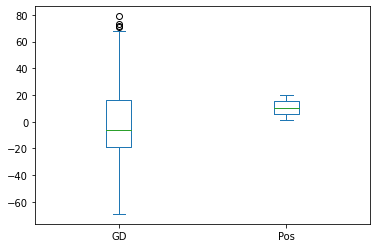

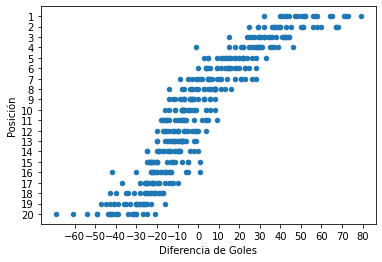

In [ ]:
df[['GD','Pos']].plot.box()
df.plot.scatter(x='GD',y='Pos')
plt.xlabel("Diferencia de Goles")
plt.ylabel("Posición")
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xticks([-60,-50,-40,-30,-20,-10,-0,10,20,30,40,50,60,70,80])
plt.gca().invert_yaxis()

**En la anterior gráfica podemos observar, que los equipos que llegan a tener nula diferencia de goles, empiezan a quedar por mitad de tabla. Los equipos que tienen una diferencia de goles negativa, se úbican desde la mitad de tabla hacía abajo. Mientras que los equipos con mayor diferencia de goles positiva, son los que ocupan las primeras posiciones en las competiciones.**

**Dividimos los datos de test y entrenamiento, en este caso tomamos el 20% de los datos para test y el resto será para entrenamiento. Utilizamos un estado randómico común de los ejemplos de Sickit-Learn.**

In [ ]:
X = df['GD'].values.reshape(-1,1)
y = df['Pos'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(352, 1)

In [ ]:
scaler = StandardScaler()

# solo hacemos fit_transform con train e con test transform
xtrain_scaled = scaler.fit_transform(X_train)
xtest_scaled = scaler.transform(X_test)

**En esta parte, generamos el modelo. En este caso utilizaremos el modelo de regresión lineal.**

In [ ]:
model = LinearRegression()
model.fit(xtrain_scaled, y_train)

LinearRegression()

**Realizamos la predicción en base al modelo**

In [ ]:
prediction = model.predict(xtest_scaled)
prediction

array([[ 9.66764502],
       [18.45039337],
       [13.34414433],
       [15.18239399],
       [11.9143946 ],
       [11.09739476],
       [ 4.76564595],
       [ 3.9486461 ],
       [19.26739322],
       [ 7.42089545],
       [ 9.05489514],
       [10.28039491],
       [15.18239399],
       [15.59089391],
       [ 2.72314633],
       [12.93564441],
       [15.38664395],
       [15.59089391],
       [12.52714449],
       [15.18239399],
       [12.11864456],
       [15.59089391],
       [12.11864456],
       [12.11864456],
       [ 7.42089545],
       [12.32289453],
       [12.11864456],
       [-2.58735267],
       [10.48464487],
       [11.50589468],
       [ 6.80814556],
       [13.54839429],
       [15.59089391],
       [17.63339353],
       [ 9.87189499],
       [11.9143946 ],
       [ 8.64639522],
       [ 2.72314633],
       [17.42914357],
       [16.61214372],
       [21.5141428 ],
       [11.50589468],
       [11.9143946 ],
       [18.45039337],
       [14.16114418],
       [12

# Error cuadrático medio

In [ ]:
mean_sqr_error=mean_squared_error(y_test,prediction)
mean_sqr_error

6.694853537635409

# Raiz del error cuadrático medio

In [ ]:
root_mse=mean_squared_error(y_test,prediction,squared=False)
root_mse

2.5874415041958745

# R2 Score

In [ ]:
r2 = r2_score(y_test,prediction)
r2

0.7976040155395595

**Con base al ejercicio de 'NYC trip prediction', utilizamos un gráfico para comprobar qué tan acertado es el modelo, comparando los valores de prueba y los valores predecidos.**

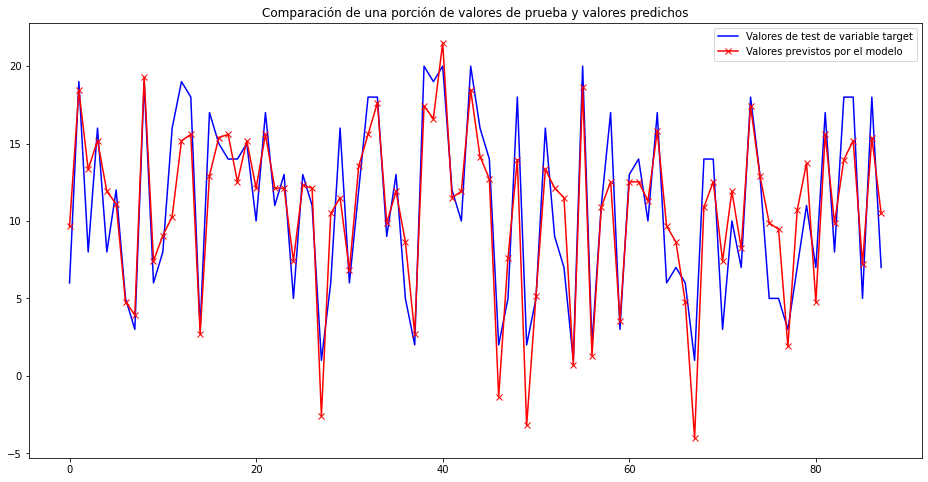

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Comparación de una porción de valores de prueba y valores predichos')
plt.plot(y_test[:200], color='blue', label='Valores de test de variable target')
plt.plot(prediction[:200], color='red', marker='x', label='Valores previstos por el modelo')
plt.legend(loc='upper right')
plt.show()

**Encontramos el mejor modelo para utilizar en este proyecto**

In [ ]:
from sklearn.model_selection import cross_val_score
regressors = [linear_model.LinearRegression(),linear_model.Ridge(alpha=.7),
              MLPRegressor(hidden_layer_sizes=(22,100,),activation='relu',max_iter=100000),
              linear_model.RANSACRegressor(random_state=0)]
names = ['lineal','ridge 0.7','MLP','RANSAC']
#from https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring =['explained_variance',
          'neg_mean_absolute_error',
          'neg_mean_squared_error',
          'neg_mean_squared_log_error',
          'neg_median_absolute_error',
          'r2']



for reg,name in zip(regressors,names):
    scores = cross_val_score(reg, X_train, y_train.ravel(), scoring=scoring[5],
                            cv=5)
    print('--------------------------------------')
    print('model {0:20} | score {1:20}'.format(name,scoring[5]))
    print('mean {0:22.2f}| std   {1:<22.2f}'.format(scores.mean(),scores.std()))
    print("Accuracy: {0:23.2f} (+/- {1:.2f})" .format(scores.mean(), scores.std() * 2))

--------------------------------------
model lineal               | score r2                  
mean                   0.85| std   0.03                  
Accuracy:                    0.85 (+/- 0.05)
--------------------------------------
model ridge 0.7            | score r2                  
mean                   0.85| std   0.03                  
Accuracy:                    0.85 (+/- 0.05)
--------------------------------------
model MLP                  | score r2                  
mean                   0.88| std   0.03                  
Accuracy:                    0.88 (+/- 0.07)
--------------------------------------
model RANSAC               | score r2                  
mean                   0.83| std   0.04                  
Accuracy:                    0.83 (+/- 0.08)


In [ ]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
#from sklearn.cross_validation import train_test_split
# de acuerdo a la version scikit train_test_split puede ser
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neural_network import MLPClassifier

x_train,x_test, y_train, y_test  = train_test_split(X,y, test_size = 0.2, random_state=42 )

#TODO: normalize the data
names=['MLP logistic','MLP tanh','MLP relu','MLP relu/SGD/three layers']
clfs=[MLPClassifier(activation='logistic',max_iter=1000),
      MLPClassifier(activation='tanh',max_iter=1000),
      MLPClassifier(activation='relu',max_iter=1000),
      MLPClassifier(activation='relu',solver='sgd',hidden_layer_sizes =(10,100,80),max_iter=10000)]

for clf,name in zip(clfs,names):
    print(name)
    scores = cross_val_score(clf, x_train, y_train, cv=5,scoring='f1_weighted',n_jobs=-1)
    print(scores)
    print('mean {a:5.3f} standard desviation {b:5.3f}'.format(a=scores.mean(),b=scores.std()))

MLP logistic
[0.17501677 0.20602438 0.2778022  0.21745897 0.1760905 ]
mean 0.210 standard desviation 0.038
MLP tanh
[0.21642677 0.17718885 0.36103896 0.20885662 0.22521851]
mean 0.238 standard desviation 0.064
MLP relu
[0.14832022 0.1762971  0.31444104 0.16559869 0.15522311]
mean 0.192 standard desviation 0.062
MLP relu/SGD/three layers
[0.17309817 0.10070211 0.21330106 0.15978736 0.09897214]
mean 0.149 standard desviation 0.044
